# How does the USA compare to Japan, and the rest of the World? 

   #### Japan is usually touted as being one of the most technologically advanced nations in the World, so how does the USA measure up to it? 
   
       Education wise (specifically looking at ratios as opposed to raw amounts due to massive population differences), the US has a higher percentage of students who attend tertiary 

In [21]:
%matplotlib notebook
import csv
import matplotlib.pyplot as plt
import numpy as np

In [18]:
count = 0
years = []
ygdp = []

tot_gdp = []
tot_edu_p = []
tot_edu_s = []
tot_edu_t = []
tot_int = []

usa_gdp = []
usa_edu_p = []
usa_edu_s = []
usa_edu_t = []
usa_int = []

jpn_gdp = []
jpn_edu_p = []
jpn_edu_s = []
jpn_edu_t = []
jpn_int = []

with open('gdpstuff.csv', 'r') as data:
    cdata = csv.reader(data, delimiter=',')
    for row in cdata:
        if row[0] == "Japan":
            ygdp.append(row[1])
            jpn_gdp.append(int(row[3]))
        elif row[0] == "United States of America":
            usa_gdp.append(int(row[3]))
        else:
            tot_gdp.append(int(row[3]))

with open('internet.csv', 'r') as data:
    cdata = csv.reader(data, delimiter=',')
    for row in cdata:
        if row[0] == "Japan":
            years.append(row[1])
            jpn_int.append(float(row[3]))
        elif row[0] == "United States of America":
            usa_int.append(float(row[3]))
        else:
            tot_int.append(float(row[3]))

with open('education.csv', 'r') as data:
    cdata = csv.reader(data, delimiter=',')
    for row in cdata:
        if count > 2:
            count = 0
        if row[0] == "Japan":
            if count == 0:
                        jpn_edu_p.append(int(row[3]))
            if count == 1:
                        jpn_edu_s.append(int(row[3]))
            if count == 2:
                        jpn_edu_t.append(int(row[3]))
            years.append(row[1])
            count += 1
        elif row[0] == "United States of America":
            if count == 0:
                        usa_edu_p.append(int(row[3]))
            if count == 1:
                        usa_edu_s.append(int(row[3]))
            if count == 2:
                        usa_edu_t.append(int(row[3]))
            count +=1

        else:
            if count == 0:
                        tot_edu_p.append(int(row[3]))
            if count == 1:
                        tot_edu_s.append(int(row[3]))
            if count == 2:
                        tot_edu_t.append(int(row[3]))
            count+=1


<IPython.core.display.Javascript object>


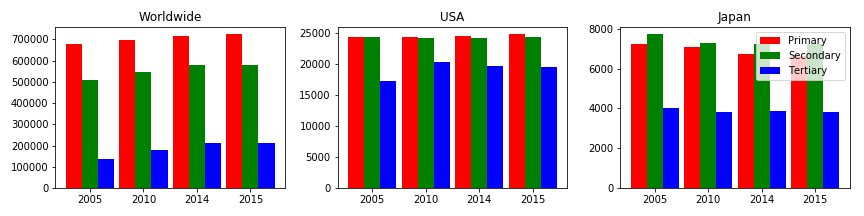

In [19]:
N = 4

fig = plt.figure(figsize = (12,3))

ind = np.arange(N)    # the x locations for the groups
width = 0.30         # the width of the bars

#Worldwide Plot

ax = fig.add_subplot(131)
p1 = ax.bar(ind, tot_edu_p, width, color='r')

p2 = ax.bar(ind + width, tot_edu_s, width, color='g')

p3 = ax.bar(ind + (width*2), tot_edu_t, width, color='b')

ax.set_title('Worldwide')
ax.set_xticks(ind + width )
ax.set_xticklabels(('2005', '2010', '2014', '2015'))

#USA Plot

ax = fig.add_subplot(132)
p4 = ax.bar(ind, usa_edu_p, width, color='r')

p5 = ax.bar(ind + width, usa_edu_s, width, color='g')

p6 = ax.bar(ind + (width*2), usa_edu_t, width, color='b')

ax.set_title('USA')
ax.set_xticks(ind + width )
ax.set_xticklabels(('2005', '2010', '2014', '2015'))

#Japan Plot

ax = fig.add_subplot(133)
p7 = ax.bar(ind, jpn_edu_p, width, color='r')

p8 = ax.bar(ind + width, jpn_edu_s, width, color='g')

p9 = ax.bar(ind + (width*2), jpn_edu_t, width, color='b')

ax.set_title('Japan')
ax.set_xticks(ind + width )
ax.set_xticklabels(('2005', '2010', '2014', '2015'))


ax.legend((p1[0], p2[0], p3[0]), ('Primary', 'Secondary', 'Tertiary'))
fig.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


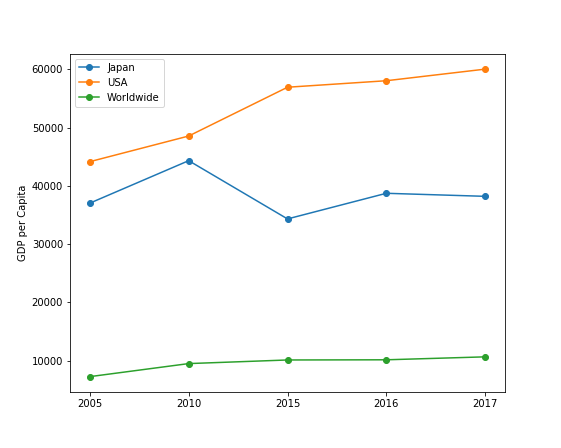

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)
count = 1
lis_jp = [jpn_gdp , jpn_int]
lis_us = [usa_gdp, usa_int] 
lis_t = [tot_gdp, tot_int]

ylbl = ['GDP per Capita', 'Percent of pop. with Interenet Access']

def onclick(event):
    global count
    
    if count > 1:
        count = 0
    
    plt.cla()
    

    
    l1, = ax.plot(ygdp,lis_jp[count] , 'o', linestyle = '-')
    l2, = ax.plot(ygdp, lis_us[count], 'o', linestyle = '-')
    l3, = ax.plot(ygdp, lis_t[count], 'o', linestyle = '-')
    ax.legend((l1, l2, l3), ('Japan', 'USA', 'Worldwide'))
    ax.set_ylabel(ylbl[count])
    count += 1
    plt.draw()


#l1, = ax.plot(ygdp, jpn_gdp, 'o', linestyle = '-')
#l2, = ax.plot(ygdp, usa_gdp, 'o', linestyle = '-')
#l3, = ax.plot(ygdp, tot_gdp, 'o', linestyle = '-')

l1, = ax.plot(ygdp, lis_jp[0], 'o', linestyle = '-')
l2, = ax.plot(ygdp, lis_us[0], 'o', linestyle = '-')
l3, = ax.plot(ygdp, lis_t[0], 'o', linestyle = '-')

ax.set_ylabel(ylbl[count])
ax.legend((l1, l2, l3), ('Japan', 'USA', 'Worldwide'))
fig.canvas.mpl_connect('button_press_event', onclick)
plt.show()